In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')

In [2]:
from collections import Counter
class ScratchDecisionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, name="ScratchDecesionTreeClassifierDepth1", verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.name = name

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        _ig = 0
        for column_index in range(X.shape[1]):
            for threshold in list(set(X[:, column_index])):
                _temp_ig = IG(X, y, column_index, threshold)
                if _ig <= _temp_ig:
                    _ig = _temp_ig
                    under_threshold_y = y[X[:, column_index] < threshold]
                    over_threshold_y = y[X[:, column_index] >= threshold]
                    # 全てthreshold未満の場合
                    if len(under_threshold_y) == 0:
                        right_leaf_label = Counter(over_threshold_y).most_common()[0][0]
                        left_leaf_label = Counter(over_threshold_y).most_common()[1][0]
                    # 全てthreshold以上の場合
                    elif len(over_threshold_y) == 0:
                        left_leaf_label = Counter(under_threshold_y).most_common()[0][0]
                        right_leaf_label = Counter(under_threshold_y).most_common()[1][0]
                    else:
                        left_leaf_label = Counter(under_threshold_y).most_common()[0][0]
                        right_leaf_label = Counter(over_threshold_y).most_common()[0][0]

                    self.left_leaf_label = left_leaf_label
                    self.right_leaf_label = right_leaf_label
                    self.column_index = column_index
                    self.threshold = threshold
                    if self.verbose:
                        #verboseをTrueにした際は学習過程を出力
                        print("カラム {}, 閾値 {}の時: {}".format(column_index,  threshold, _ig))

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        return np.where(X[:, self.column_index] < self.threshold, self.left_leaf_label,  self.right_leaf_label)

# 問題1
def GINI(y):
    labels, counts = np.unique(y, return_counts=True)
    gini = 1 - ((counts / counts.sum()) ** 2).sum()
    return gini

# 問題2
def IG(X, y, column_index, threshold):
    n_all = len(y)
    child_left_y = y[X[:, column_index] < threshold]
    child_right_y = y[X[:, column_index] >= threshold]
    i_p = GINI(y)
    i_left = GINI(child_left_y)
    i_right = GINI(child_right_y)
    ig_p = i_p - ((len(child_left_y) / n_all) * i_left) - ((len(child_right_y) / n_all)) * i_right
    return ig_p

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [14]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def display_plot(X, y, model):
    mesh1, mesh2 = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01),
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh1), np.ravel(mesh2)]
    y_pred = model.predict(mesh).reshape(mesh1.shape)
    plt.xlabel('f0')
    plt.ylabel('f1')
    # contourf: 塗りつぶし
    plt.contourf(mesh1, mesh2, y_pred, cmap=ListedColormap(['pink', 'skyblue']))
    # contour: 等高線
    plt.contour(mesh1, mesh2, y_pred, colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='versicolor')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='virginica')
    plt.legend()
    plt.show()

def evaluate_model(X, y, model, model_name):
    y_pred = model.predict(X)
    result = pd.DataFrame(
        [accuracy_score(y, y_pred), precision_score(y, y_pred, average="micro"), recall_score(y, y_pred, average="micro")],
        index=['Accuracy', 'Precision', 'Recall'],
        columns=[model_name]
     )
    return result

In [5]:
# 問題5
# irisデータで学習と予測
X = iris.data[:100,:]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
dtc = ScratchDecisionTreeClassifierDepth1(verbose=True)
dtc.fit(X_train, y_train)
evaluate_model(X_test, y_test, dtc, dtc.name)

カラム 0, 閾値 4.9の時: 0.08387867647058833
カラム 0, 閾値 5.0の時: 0.09917396125116723
カラム 0, 閾値 6.1の時: 0.1212259615384616
カラム 0, 閾値 5.2の時: 0.2125208333333334
カラム 0, 閾値 5.6の時: 0.2660877557544757
カラム 0, 閾値 5.5の時: 0.31970000781738594
カラム 2, 閾値 3.9の時: 0.38827445652173914
カラム 2, 閾値 3.3の時: 0.49968750000000006
カラム 3, 閾値 1.0の時: 0.49968750000000006


,ScratchDecesionTreeClassifierDepth1
Accuracy,1.0
Precision,1.0
Recall,1.0


In [6]:
# index 3の要素で1を堺に分割すると正しく分割できるのか確認
print(np.where(X_test[:, 3] <1, 0, 1))
print(y_test)
display("上記より完全に一致")

[1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0]
[1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0]


'上記より完全に一致'

In [17]:
# scikit learnの決定木で検証
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X = iris.data[:100,:]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.fit(X_train, y_train)
evaluate_model(X_test, y_test, clf, "sklearn DecisionTreeClassifier")

,sklearn DecisionTreeClassifier
Accuracy,1.0
Precision,1.0
Recall,1.0


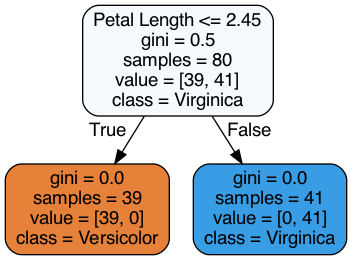

In [8]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(clf, filled=True, rounded=True, class_names=['Versicolor', 'Virginica'], feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('scratch_decision_tree.png')
from IPython.display import Image
Image('scratch_decision_tree.png')

In [9]:
# 'Petal Length 2.6で分割
print(np.where(X_test[:, 2] <=2.6, 0, 1))
print(y_test)

[1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1]
[1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1]


#### 考察

自作決定木とsklearnの決定木で精度はどちらも正確に分割できたが閾値が異なった。

カラム 0, 閾値 4.6の時: 0.02764802631578961
カラム 0, 閾値 5.3の時: 0.21500020148291435
カラム 0, 閾値 5.5の時: 0.2809570434646656


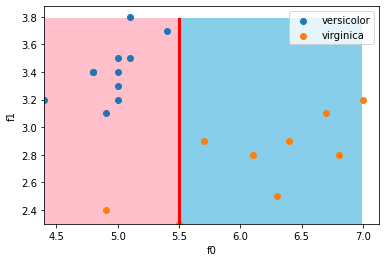

In [10]:
# 問題6
# plotするため、カラムを2つにして学習と予測
X = iris.data[:100,[0,1]]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
dtc = ScratchDecisionTreeClassifierDepth1(verbose=True)
dtc.fit(X_train, y_train)
display_plot(X_test, y_test, dtc)

カラム 0, 閾値 4.8の時: 0.06420138888888882
カラム 0, 閾値 5.4の時: 0.24577209512837392
カラム 0, 閾値 5.5の時: 0.3375284090909089
カラム 1, 閾値 1.1の時: 0.3681177325581395
カラム 1, 閾値 1.0の時: 0.4971875


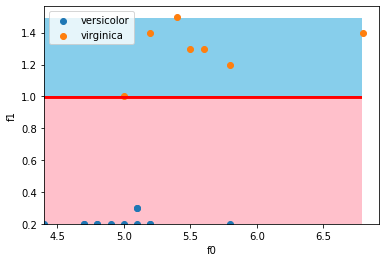

'index 3の要素が入ると正しく分割できる'

In [11]:
# カラム3の要素を加える
X = iris.data[:100,[0,3]]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
dtc = ScratchDecisionTreeClassifierDepth1(verbose=True)
dtc.fit(X_train, y_train)
display_plot(X_test, y_test, dtc)
display("index 3の要素が入ると正しく分割できる")

In [12]:
# 問題7
class Node():
    def __init__(self, label, depth, max_depth, verbose):
        # ハイパーパラメータを属性として記録
        self.label = label
        self.depth = depth
        self.max_depth = max_depth
        self.verbose = verbose
        self.bottom = False
        
    def split(self, X, y):
        print("start split... label: {}, depth: {}, max_depth: {}".format(self.label, self.depth, self.max_depth))
        self.gini = GINI(y)

        if self.max_depth == self.depth:
            self.bottom = True
            print("max_depth achieved...")
            return
        if self.gini == 0:
            print("GINI = 0 achieved...")
            return
        
        print("start fitting...")

        _ig = 0
        for column_index in range(X.shape[1]):
            for threshold in list(set(X[:, column_index])):
                _temp_ig = IG(X, y, column_index, threshold)
                if _ig <= _temp_ig:
                    _ig = _temp_ig
                    under_threshold_y = y[X[:, column_index] < threshold]
                    over_threshold_y = y[X[:, column_index] >= threshold]
                    # 全てthreshold未満の場合
                    if len(under_threshold_y) == 0:
                        right_leaf_label = Counter(over_threshold_y).most_common()[0][0]
                        left_leaf_label = Counter(over_threshold_y).most_common()[1][0]
                    # 全てthreshold以上の場合
                    elif len(over_threshold_y) == 0:
                        left_leaf_label = Counter(under_threshold_y).most_common()[0][0]
                        right_leaf_label = Counter(under_threshold_y).most_common()[1][0]
                    else:
                        left_leaf_label = Counter(under_threshold_y).most_common()[0][0]
                        right_leaf_label = Counter(over_threshold_y).most_common()[0][0]

                    self.left_leaf_label = left_leaf_label
                    self.right_leaf_label = right_leaf_label
                    self.column_index = column_index
                    self.threshold = threshold
                    if self.verbose:
                        #verboseをTrueにした際は学習過程を出力
                        print("カラム {}, 閾値 {}の時: {}".format(column_index,  threshold, _ig))

        self.left_node = Node(self.left_leaf_label, self.depth + 1, self.max_depth, self.verbose)
        self.right_node = Node(self.right_leaf_label, self.depth + 1, self.max_depth, self.verbose)
        self.ig = _ig

        self.left_node.split(X[X[:, self.column_index] < self.threshold], y[X[:, self.column_index] < self.threshold])
        self.right_node.split(X[X[:, self.column_index] >= self.threshold], y[X[:, self.column_index] >= self.threshold])
        
    def predict(self, X_value):
        if self.gini == 0 or self.bottom:
            return self.label
        else:
            if X_value[self.column_index] < self.threshold:
                return self.left_node.predict(X_value)
            else:
                return self.right_node.predict(X_value)

class ScratchDecisionTreeClassifierDepthInf():
    """
    深さ2の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, name="ScratchDecisionTreeClassifierDepthInf", max_depth=None, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self.name = name
        self.max_depth = max_depth

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        depth = 0
        self.tree = Node(None, depth, self.max_depth, self.verbose)
        self.tree.split(X, y)

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        return np.array(list(map(self.tree.predict, X)))

In [15]:
# 問題7
X = iris.data
y = iris.target
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
dtcInf = ScratchDecisionTreeClassifierDepthInf(max_depth=2, verbose=True)
dtcInf.fit(X_train, y_train)
p = dtcInf.predict(X_test)
evaluate_model(X_test, y_test, dtcInf, dtcInf.name)

start split... label: None, depth: 0, max_depth: 2
start fitting...
カラム 0, 閾値 4.4の時: 0.006079598506068984
カラム 0, 閾値 5.3の時: 0.2151037031006911
カラム 0, 閾値 5.4の時: 0.2261854585651119
カラム 0, 閾値 5.5の時: 0.24923611111111105
カラム 2, 閾値 4.6の時: 0.2613230994152046
カラム 2, 閾値 5.0の時: 0.27907987684150465
カラム 2, 閾値 3.0の時: 0.32251171352074953
カラム 3, 閾値 1.0の時: 0.32251171352074953
start split... label: 0, depth: 1, max_depth: 2
GINI = 0 achieved...
start split... label: 2, depth: 1, max_depth: 2
start fitting...
カラム 0, 閾値 4.9の時: 0.0
カラム 0, 閾値 5.5の時: 0.018348835564686916
カラム 0, 閾値 6.3の時: 0.09423022888425406
カラム 0, 閾値 6.2の時: 0.10166120592525005
カラム 2, 閾値 4.2の時: 0.1475498023276665
カラム 2, 閾値 4.6の時: 0.2658749725010966
カラム 2, 閾値 5.0の時: 0.34130649805723307
カラム 2, 閾値 4.9の時: 0.3538700412666155
カラム 2, 閾値 4.8の時: 0.3755648035088617
start split... label: 1, depth: 2, max_depth: 2
max_depth achieved...
start split... label: 2, depth: 2, max_depth: 2
max_depth achieved...


,ScratchDecisionTreeClassifierDepthInf
Accuracy,0.933333
Precision,0.933333
Recall,0.933333


In [33]:
# 問題8
X = iris.data
y = iris.target
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
dtcInf = ScratchDecisionTreeClassifierDepthInf(verbose=True)
dtcInf.fit(X_train, y_train)
p = dtcInf.predict(X_test)
evaluate_model(X_test, y_test, dtcInf, dtcInf.name)

start split... label: None, depth: 0, max_depth: None
start fitting...
カラム 0, 閾値 4.6の時: 0.0247557471264368
カラム 0, 閾値 5.5の時: 0.21369802922712766
カラム 2, 閾値 1.6の時: 0.21849637681159417
カラム 2, 閾値 4.7の時: 0.23590277777777768
カラム 2, 閾値 5.0の時: 0.2620897518185708
カラム 2, 閾値 3.0の時: 0.320035140562249
カラム 3, 閾値 1.0の時: 0.320035140562249
start split... label: 0, depth: 1, max_depth: None
GINI = 0 achieved...
start split... label: 1, depth: 1, max_depth: None
start fitting...
カラム 0, 閾値 4.9の時: 0.0
カラム 0, 閾値 5.0の時: 1.6128772116486e-05
カラム 0, 閾値 5.8の時: 0.10942525651114277
カラム 0, 閾値 6.2の時: 0.1135780930412573
カラム 2, 閾値 4.7の時: 0.29973404806834913
カラム 2, 閾値 5.0の時: 0.36587253686061083
カラム 2, 閾値 4.8の時: 0.3690774556647688
カラム 3, 閾値 1.7の時: 0.4084146350780421
カラム 3, 閾値 1.8の時: 0.4111642674260229
start split... label: 1, depth: 2, max_depth: None
start fitting...
カラム 0, 閾値 4.9の時: 0.0
カラム 0, 閾値 5.0の時: 0.015301041195111054
カラム 2, 閾値 5.0の時: 0.06312272305934596
start split... label: 1, depth: 3, max_depth: None
start fi

,ScratchDecisionTreeClassifierDepthInf
Accuracy,0.933333
Precision,0.933333
Recall,0.933333


In [30]:
# sklearnの比較
# scikit learnの決定木で検証
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X = iris.data
y = iris.target
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.fit(X_train, y_train)
evaluate_model(X_test, y_test, clf, "sklearn DecisionTreeClassifier")

,sklearn DecisionTreeClassifier
Accuracy,0.966667
Precision,0.966667
Recall,0.966667


sklearnよりいい結果が出た？

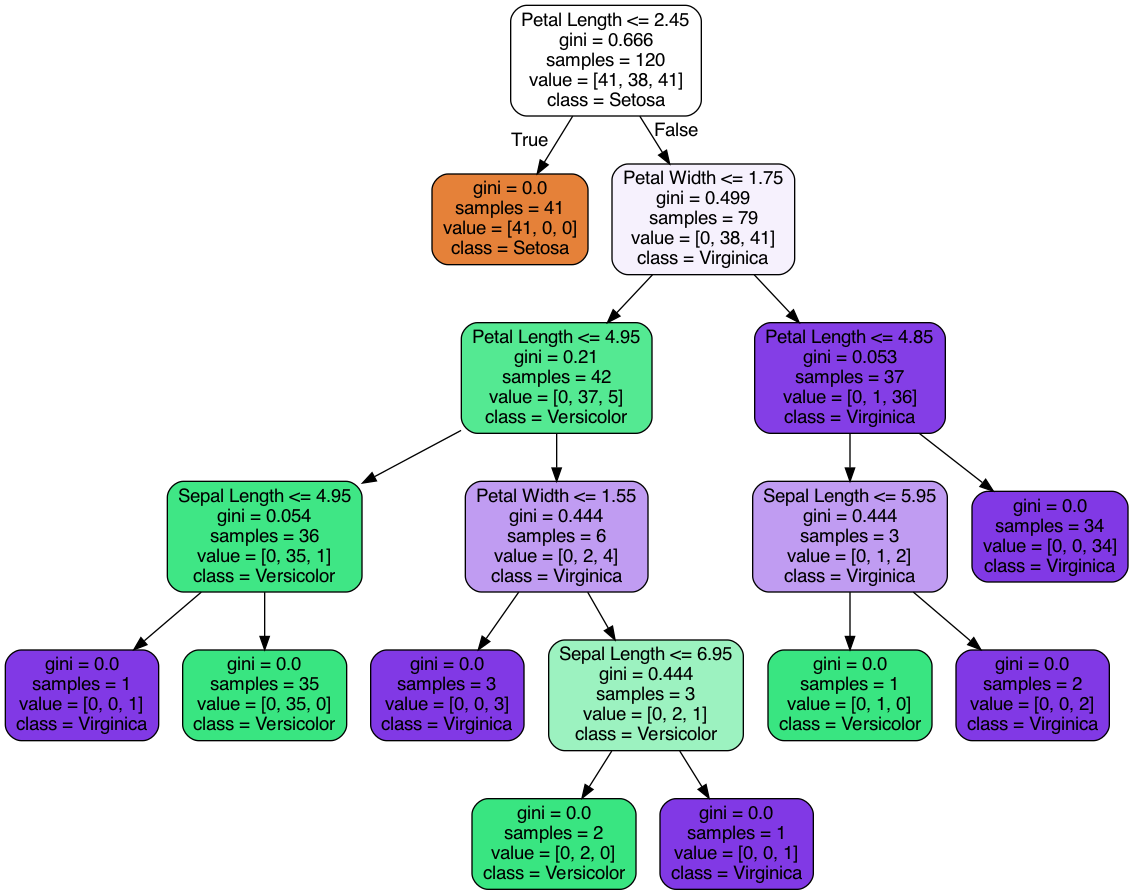

In [32]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(clf, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png(''result/scratch_decision_tree/scratch_decision_tree_depth_inf.png')
Image('result/scratch_decision_tree/scratch_decision_tree_depth_inf.png')